In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

from sklearn import cross_validation
import data_handler as dh
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import metrics
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np

In [2]:
path = '/Users/Martin/Dropbox/Genomique/new_data'

df_labels, df_train_orig, _, _ = dh.get_data(path, imputer_style='double_knn', imputer_neighbors=3, option_normalize=None)

cox_selected = ['BMI', 'ALT', 'CREAT', 'HB', 'LDH', 'PLT', 'MG', 'PHOS', 'ABDOMINAL', 'ACE_INHIBITORS', 'AGEGRP2', 'BILATERAL_ORCHIDECTOMY', 'DVT', 'ECOG_C', 'GASTREFL', 'GLUCOCORTICOID', 'KIDNEYS', 'LYMPHADENECTOMY', 'MHBLOOD', 'MHMETAB', 'MHNERV', 'MHSURG', 'MHVASC', 'PATHFRAC', 'PROSTATE', 'RACE_C', 'RECTAL', 'SPINAL_CORD_SURGERY', 'SPINCOMP', 'TARGET', 'WGTBLCAT']

df_train_orig = df_train_orig.fillna(df_train_orig.mean())
study_ids = ['CELGENE', 'EFC6546', 'ASCENT2']

t_points = [12, 18, 24]

to_classify_columns = []

for t1 in t_points:
    df_labels['0m-%im' % t1] = ((df_labels['DEATH=YES'] == 1) & (df_labels['LKADT_P'] < t1*30.5)).astype(int)
    to_classify_columns += ['0m-%im' % t1]

score_function_dict = {'DEATH=YES':'scoreiAUC', '0m-12m':'score_auc12', '0m-18m':'score_auc18', '0m-24m':'score_auc24'}


cols_to_remove = set(df_train_orig.columns)
to_keep_cols = []

# variables from cox R model
cox_selected_translated = ['V1', 'V2', 'V3', 'global_risk']
for f in df_train_orig.columns:
    for g in cox_selected:
        if g in f:
            cox_selected_translated += [f]
            break
            
df_train_cox_selected = df_train_orig[cox_selected_translated].copy()
df_train_all = df_train_orig.copy()

 Variables to drop because too many missing values: ['CREACL', 'LYM', 'RBC']
 Variables to keep but missing values: ['LDH', 'CREAT', 'NA.', 'HB', 'PHOS', 'BMI', 'TPRO', 'TESTO', 'MG', 'PSA', 'TBILI', 'NEU', 'AST', 'PLT', 'ALB', 'ALT', 'ALP', 'WBC', 'CA']
[('PHOS', 6), ('BMI', 12), ('CREAT', 7), ('AST', 2), ('ALP', 6), ('TPRO', 7), ('CA', 3), ('LDH', 18), ('NA.', 5), ('MG', 6), ('TBILI', 1), ('PLT', 2), ('PSA', 3), ('HB', 2), ('ALB', 5), ('ALT', 1), ('NEU', 1), ('TESTO', 6), ('WBC', 8)]
[('PHOS', 8), ('BMI', 13), ('CREAT', 9), ('AST', 7), ('ALP', 11), ('TPRO', 9), ('CA', 10), ('LDH', 10), ('NA.', 25), ('MG', 34), ('TBILI', 6), ('PLT', 6), ('PSA', 8), ('HB', 9), ('ALB', 32), ('ALT', 6), ('NEU', 5), ('TESTO', 8), ('WBC', 4)]
            V1        V2        V3  global_risk
0     0.821809  0.643156  0.503964     0.853845
1     0.796662  0.599738  0.452138     0.989061
2     0.798472  0.602807  0.455736     0.979186
3     0.761990  0.542624  0.387074     1.182661
4     0.889865  0.769179  0.

for 0m-12m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.639927 ['0.6616', '0.6060', '0.6522']
depth 2, n_estimator 100, max_features 5	 rf 0.639081 ['0.6530', '0.6227', '0.6416']
depth 2, n_estimator 100, max_features 25	 rf 0.649121 ['0.6791', '0.6054', '0.6629']
depth 2, n_estimator 100, max_features 45	 rf 0.650538 ['0.6849', '0.6139', '0.6528']
depth 3, n_estimator 100, max_features auto	 rf 0.657138 ['0.6873', '0.6285', '0.6556']
depth 3, n_estimator 100, max_features 5	 rf 0.647111 ['0.6589', '0.6230', '0.6594']
depth 3, n_estimator 100, max_features 25	 rf 0.651611 ['0.6716', '0.6256', '0.6577']
depth 3, n_estimator 100, max_features 45	 rf 0.655589 ['0.6861', '0.6330', '0.6477']
depth 4, n_estimator 100, max_features auto	 rf 0.637739 ['0.6741', '0.6012', '0.6380']
depth 4, n_estimator 100, max_features 5	 rf 0.648945 ['0.6608', '0.6277', '0.6584']
depth 4, n_estimator 100, max_features 25	 rf 0.649757 ['0.6776', '0.6151', '0.6566']
depth 4, n_estimator 100

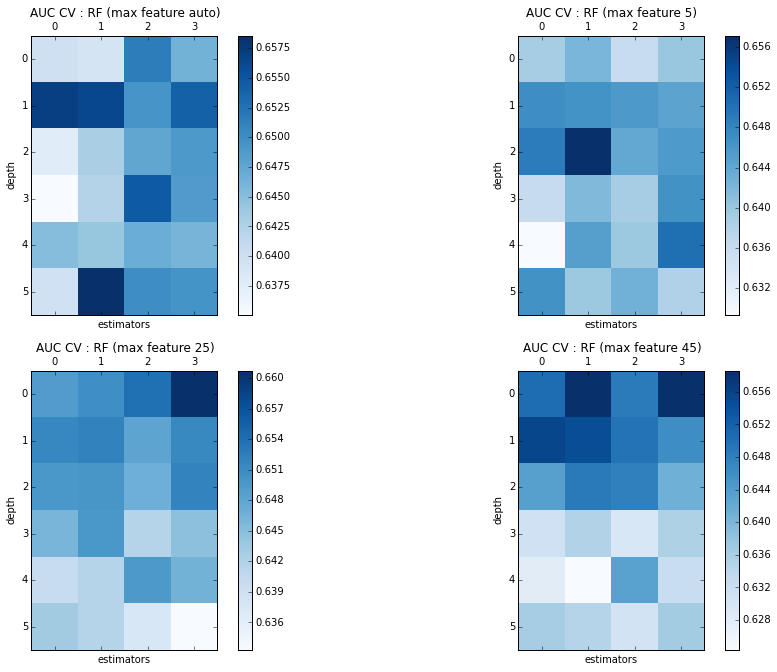

for 0m-18m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.616860 ['0.6570', '0.5922', '0.6014']
depth 2, n_estimator 100, max_features 5	 rf 0.611279 ['0.6596', '0.5816', '0.5926']
depth 2, n_estimator 100, max_features 25	 rf 0.624998 ['0.6767', '0.5872', '0.6110']
depth 2, n_estimator 100, max_features 45	 rf 0.621943 ['0.6784', '0.5857', '0.6017']
depth 3, n_estimator 100, max_features auto	 rf 0.618733 ['0.6795', '0.5792', '0.5975']
depth 3, n_estimator 100, max_features 5	 rf 0.617392 ['0.6602', '0.5779', '0.6140']
depth 3, n_estimator 100, max_features 25	 rf 0.622030 ['0.6820', '0.5938', '0.5903']
depth 3, n_estimator 100, max_features 45	 rf 0.632884 ['0.7019', '0.5981', '0.5986']
depth 4, n_estimator 100, max_features auto	 rf 0.625431 ['0.6807', '0.5868', '0.6088']
depth 4, n_estimator 100, max_features 5	 rf 0.613700 ['0.6583', '0.5684', '0.6144']
depth 4, n_estimator 100, max_features 25	 rf 0.626468 ['0.6757', '0.5918', '0.6119']
depth 4, n_estimator 100

KeyboardInterrupt: 

In [5]:
debug = False

df_train = df_train_cox_selected

for label in to_classify_columns:
    print 'for %s' % label
    print '---------------'
    y = df_labels[label].values
    X = df_train.values
    time = df_labels['LKADT_P'].values

    max_depths = range(2, 8)
    n_estimators = [100, 300, 1000, 2000]
    max_features = ['auto', 5, 25, 45]

    test_AUCs = np.zeros((len(max_depths), len(n_estimators), len(max_features)))

    for n_estimator, max_depth, max_feature in itertools.product(n_estimators, max_depths, max_features):
        criteria = []
        i = max_depths.index(max_depth)
        j = n_estimators.index(n_estimator)
        k = max_features.index(max_feature)

        for study_id in study_ids:
            train_split = (df_labels['STUDYID'] != study_id).values
            test_split = (df_labels['STUDYID'] == study_id).values

            clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, max_features=max_feature)
            clf.fit(X[train_split], y[train_split])
            criteria += [metrics.get_time_auc(clf, X[test_split], y[test_split], time[test_split],
                                              score_function=score_function_dict[label], n_bootstrap=30)]
            #criteria += [metrics.get_auc(clf, X[test_split], y[test_split], n_bootstrap=30)]

        test_AUCs[i, j, k] = sum(criteria)/len(criteria)
        print 'depth %i, n_estimator %i, max_features %s\t rf %f' % (max_depth, n_estimator, str(max_feature), test_AUCs[i, j, k]), ['%.4f' % c for c in criteria]


    print '\n'
    
    fig = plt.figure(figsize=(16,11))
    for k in range(len(max_features)):
        ax1 = fig.add_subplot(2, 2, k + 1)
        cax1 = ax1.matshow(test_AUCs[:,:,k], interpolation='nearest', cmap=plt.get_cmap("Blues"))
        fig.colorbar(cax1)
        ax1.set_title('AUC CV : RF (max feature %s)' % str(max_features[k]))
        ax1.set_ylabel('depth')
        ax1.set_xlabel('estimators')

    plt.show()


for 0m-12m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.659462 ['0.6599', '0.6390', '0.6795']
depth 2, n_estimator 100, max_features 5	 rf 0.649040 ['0.6502', '0.6376', '0.6593']
depth 2, n_estimator 100, max_features 45	 rf 0.656136 ['0.6678', '0.6300', '0.6706']
depth 2, n_estimator 100, max_features 100	 rf 0.659995 ['0.6697', '0.6329', '0.6774']
depth 3, n_estimator 100, max_features auto	 rf 0.646991 ['0.6747', '0.6125', '0.6538']
depth 3, n_estimator 100, max_features 5	 rf 0.648872 ['0.6631', '0.6100', '0.6735']
depth 3, n_estimator 100, max_features 45	 rf 0.655892 ['0.6541', '0.6365', '0.6771']
depth 3, n_estimator 100, max_features 100	 rf 0.664824 ['0.6715', '0.6411', '0.6818']
depth 4, n_estimator 100, max_features auto	 rf 0.672314 ['0.6868', '0.6394', '0.6908']
depth 4, n_estimator 100, max_features 5	 rf 0.665947 ['0.6860', '0.6475', '0.6643']
depth 4, n_estimator 100, max_features 45	 rf 0.662240 ['0.6577', '0.6394', '0.6896']
depth 4, n_estimator 1

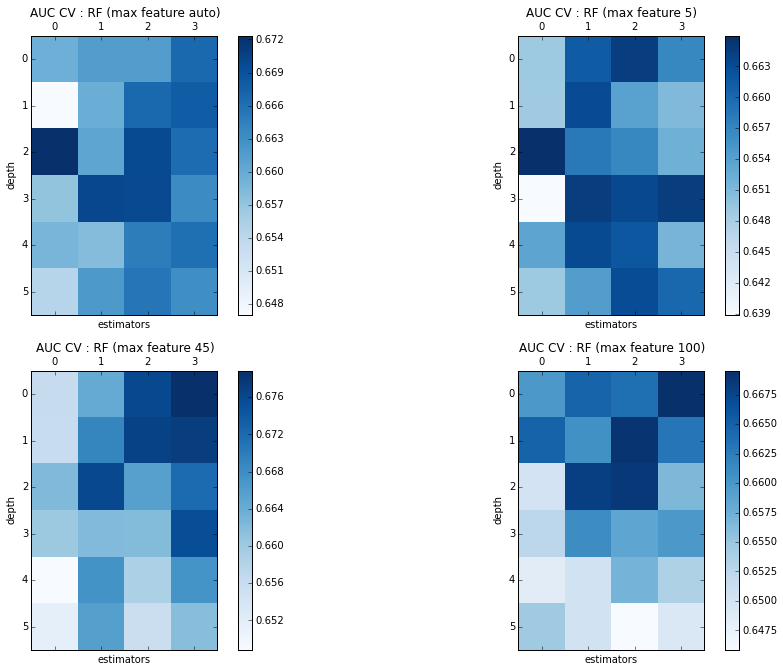

for 0m-18m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.622679 ['0.6629', '0.5911', '0.6140']
depth 2, n_estimator 100, max_features 5	 rf 0.623381 ['0.6613', '0.5936', '0.6152']
depth 2, n_estimator 100, max_features 45	 rf 0.632823 ['0.6663', '0.6107', '0.6215']
depth 2, n_estimator 100, max_features 100	 rf 0.632647 ['0.6707', '0.6110', '0.6163']
depth 3, n_estimator 100, max_features auto	 rf 0.624620 ['0.6478', '0.5941', '0.6319']
depth 3, n_estimator 100, max_features 5	 rf 0.617981 ['0.6539', '0.5927', '0.6073']
depth 3, n_estimator 100, max_features 45	 rf 0.640537 ['0.6810', '0.6119', '0.6286']
depth 3, n_estimator 100, max_features 100	 rf 0.631445 ['0.6701', '0.5955', '0.6288']
depth 4, n_estimator 100, max_features auto	 rf 0.632985 ['0.6745', '0.5997', '0.6248']
depth 4, n_estimator 100, max_features 5	 rf 0.622571 ['0.6608', '0.5925', '0.6144']
depth 4, n_estimator 100, max_features 45	 rf 0.628572 ['0.6648', '0.6124', '0.6085']
depth 4, n_estimator 1

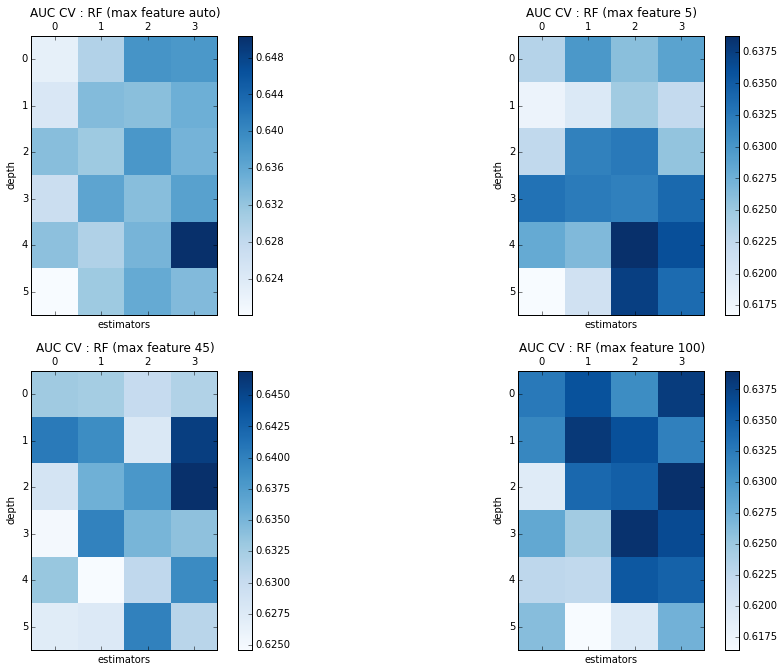

for 0m-24m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.616069 ['0.6545', '0.5768', '0.6169']
depth 2, n_estimator 100, max_features 5	 rf 0.639084 ['0.6980', '0.5892', '0.6301']
depth 2, n_estimator 100, max_features 45	 rf 0.615376 ['0.6735', '0.5796', '0.5930']
depth 2, n_estimator 100, max_features 100	 rf 0.583008 ['0.5615', '0.5749', '0.6126']
depth 3, n_estimator 100, max_features auto	 rf 0.617724 ['0.6518', '0.5709', '0.6305']
depth 3, n_estimator 100, max_features 5	 rf 0.645812 ['0.7221', '0.5641', '0.6512']
depth 3, n_estimator 100, max_features 45	 rf 0.637123 ['0.7243', '0.5701', '0.6170']
depth 3, n_estimator 100, max_features 100	 rf 0.614413 ['0.6309', '0.5740', '0.6384']
depth 4, n_estimator 100, max_features auto	 rf 0.656363 ['0.7475', '0.5790', '0.6426']
depth 4, n_estimator 100, max_features 5	 rf 0.601576 ['0.6598', '0.5746', '0.5703']
depth 4, n_estimator 100, max_features 45	 rf 0.612950 ['0.6886', '0.5788', '0.5714']
depth 4, n_estimator 1

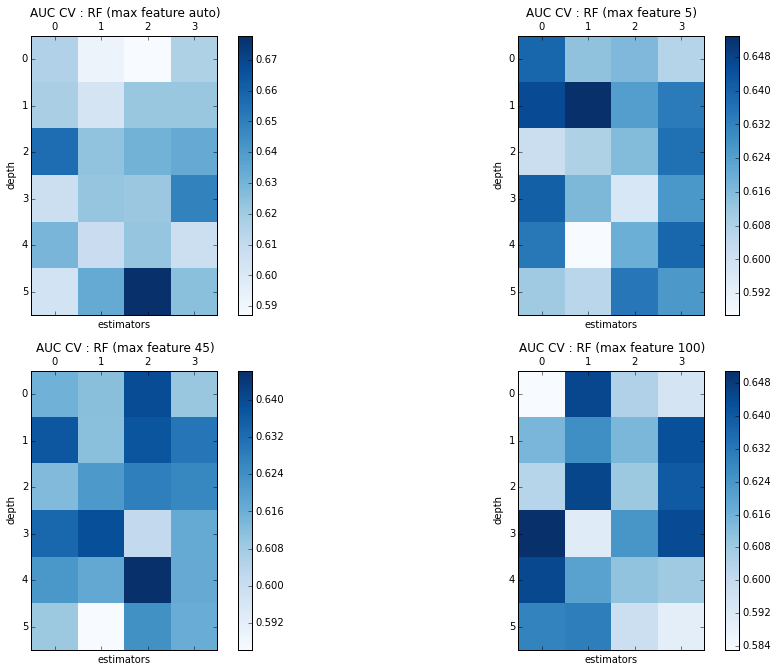

In [6]:
debug = False

df_train = df_train_all

for label in to_classify_columns:
    print 'for %s' % label
    print '---------------'
    y = df_labels[label].values
    X = df_train.values
    time = df_labels['LKADT_P'].values

    max_depths = range(2, 8)
    n_estimators = [100, 300, 1000, 2000]
    max_features = ['auto', 5, 45, 100]

    test_AUCs = np.zeros((len(max_depths), len(n_estimators), len(max_features)))

    for n_estimator, max_depth, max_feature in itertools.product(n_estimators, max_depths, max_features):
        criteria = []
        i = max_depths.index(max_depth)
        j = n_estimators.index(n_estimator)
        k = max_features.index(max_feature)

        for study_id in study_ids:
            train_split = (df_labels['STUDYID'] != study_id).values
            test_split = (df_labels['STUDYID'] == study_id).values

            clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, max_features=max_feature)
            clf.fit(X[train_split], y[train_split])
            criteria += [metrics.get_time_auc(clf, X[test_split], y[test_split], time[test_split],
                                              score_function=score_function_dict[label], n_bootstrap=30)]
            #criteria += [metrics.get_auc(clf, X[test_split], y[test_split], n_bootstrap=30)]

        test_AUCs[i, j, k] = sum(criteria)/len(criteria)
        print 'depth %i, n_estimator %i, max_features %s\t rf %f' % (max_depth, n_estimator, str(max_feature), test_AUCs[i, j, k]), ['%.4f' % c for c in criteria]


    print '\n'
    
    fig = plt.figure(figsize=(16,11))
    for k in range(len(max_features)):
        ax1 = fig.add_subplot(2, 2, k + 1)
        cax1 = ax1.matshow(test_AUCs[:,:,k], interpolation='nearest', cmap=plt.get_cmap("Blues"))
        fig.colorbar(cax1)
        ax1.set_title('AUC CV : RF (max feature %s)' % str(max_features[k]))
        ax1.set_ylabel('depth')
        ax1.set_xlabel('estimators')

    plt.show()


In [9]:
debug = False

df_train = df_train_all

for label in to_classify_columns:
    print 'for %s' % label
    print '---------------'
    y = df_labels[label].values
    X = df_train.values
    time = df_labels['LKADT_P'].values

    max_depths = range(2,6)# 8)
    n_estimators = [100, 300]#, 1000, 2000]
    max_features = ['auto']#, 5]#, 45, 100]

    test_AUCs = np.zeros((len(max_depths), len(n_estimators), len(max_features)))

    for n_estimator, max_depth, max_feature in itertools.product(n_estimators, max_depths, max_features):
        criteria = []
        i = max_depths.index(max_depth)
        j = n_estimators.index(n_estimator)
        k = max_features.index(max_feature)

        for study_id in study_ids:
            train_split = (df_labels['STUDYID'] != study_id).values
            test_split = (df_labels['STUDYID'] == study_id).values

            clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, max_features=max_feature)
            clf.fit(X[train_split], y[train_split])
            criteria += [metrics.get_time_auc(clf, X[test_split], y[test_split], time[test_split],
                                              score_function=score_function_dict[label], n_bootstrap=30)]
            #criteria += [metrics.get_auc(clf, X[test_split], y[test_split], n_bootstrap=30)]

        test_AUCs[i, j, k] = sum(criteria)/len(criteria)
        print 'depth %i, n_estimator %i, max_features %s\t rf %f' % (max_depth, n_estimator, str(max_feature), test_AUCs[i, j, k]), ['%.4f' % c for c in criteria]


    print '\n'
    
    fig = plt.figure(figsize=(16,11))
    for k in range(len(max_features)):
        ax1 = fig.add_subplot(2, 2, k + 1)
        cax1 = ax1.matshow(test_AUCs[:,:,k], interpolation='nearest', cmap=plt.get_cmap("Blues"))
        fig.colorbar(cax1)
        ax1.set_title('AUC CV : RF (max feature %s)' % str(max_features[k]))
        ax1.set_ylabel('depth')
        ax1.set_xlabel('estimators')

    plt.show()


['BMI',
 'ALT',
 'CREAT',
 'HB',
 'LDH',
 'PLT',
 'MG',
 'PHOS',
 'ABDOMINAL=Y',
 'ACE_INHIBITORS=YES',
 'AGEGRP2=65-74',
 'AGEGRP2=>=75',
 'BILATERAL_ORCHIDECTOMY=Y',
 'BISPHOSPHONATE=YES',
 'DVT=Y',
 'ECOG_C=0',
 'ECOG_C=1',
 'ECOG_C=2',
 'ECOG_C=3',
 'GASTREFL=Y',
 'GLUCOCORTICOID=YES',
 'HMG_COA_REDUCT=YES',
 'KIDNEYS=Y',
 'LYMPHADENECTOMY=Y',
 'MHBLOOD=YES',
 'MHMETAB=YES',
 'MHNERV=YES',
 'MHSURG=YES',
 'MHVASC=YES',
 'NON_TARGET=Y',
 'PATHFRAC=Y',
 'PROSTATE=Y',
 'PROSTATECTOMY=Y',
 'RACE_C=Black',
 'RACE_C=Hispanic',
 'RACE_C=Missing',
 'RACE_C=Other',
 'RACE_C=White',
 'RECTAL=Y',
 'SPINAL_CORD_SURGERY=Y',
 'SPINCOMP=Y',
 'TARGET=Y',
 'WGTBLCAT=>=100-110',
 'WGTBLCAT=>=110-120',
 'WGTBLCAT=>=120-130',
 'WGTBLCAT=>=130-140',
 'WGTBLCAT=>=140-150',
 'WGTBLCAT=>=40-50',
 'WGTBLCAT=>=50-60',
 'WGTBLCAT=>=60-70',
 'WGTBLCAT=>=70-80',
 'WGTBLCAT=>=80-90',
 'WGTBLCAT=>=90-100']

In [8]:

cox_selected_translated = []
for f in df_train_orig.columns:
    for g in cox_selected:
        if g in f:
            cox_selected_translated += [f]
            break

In [14]:
cox_selected_translated

['V1',
 'V2',
 'V3',
 'BMI',
 'ALT',
 'CREAT',
 'HB',
 'LDH',
 'PLT',
 'MG',
 'PHOS',
 'ABDOMINAL=Y',
 'ACE_INHIBITORS=YES',
 'AGEGRP2=65-74',
 'AGEGRP2=>=75',
 'BILATERAL_ORCHIDECTOMY=Y',
 'BISPHOSPHONATE=YES',
 'DVT=Y',
 'ECOG_C=0',
 'ECOG_C=1',
 'ECOG_C=2',
 'ECOG_C=3',
 'GASTREFL=Y',
 'GLUCOCORTICOID=YES',
 'HMG_COA_REDUCT=YES',
 'KIDNEYS=Y',
 'LYMPHADENECTOMY=Y',
 'MHBLOOD=YES',
 'MHMETAB=YES',
 'MHNERV=YES',
 'MHSURG=YES',
 'MHVASC=YES',
 'NON_TARGET=Y',
 'PATHFRAC=Y',
 'PROSTATE=Y',
 'PROSTATECTOMY=Y',
 'RACE_C=Black',
 'RACE_C=Hispanic',
 'RACE_C=Missing',
 'RACE_C=Other',
 'RACE_C=White',
 'RECTAL=Y',
 'SPINAL_CORD_SURGERY=Y',
 'SPINCOMP=Y',
 'TARGET=Y',
 'WGTBLCAT=>=100-110',
 'WGTBLCAT=>=110-120',
 'WGTBLCAT=>=120-130',
 'WGTBLCAT=>=130-140',
 'WGTBLCAT=>=140-150',
 'WGTBLCAT=>=40-50',
 'WGTBLCAT=>=50-60',
 'WGTBLCAT=>=60-70',
 'WGTBLCAT=>=70-80',
 'WGTBLCAT=>=80-90',
 'WGTBLCAT=>=90-100']

for 0m-12m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.684889 ['0.6920', '0.7015', '0.6376', '0.6897', '0.7036']
depth 3, n_estimator 100, max_features auto	 rf 0.678191 ['0.6983', '0.6966', '0.6286', '0.6619', '0.7055']
depth 4, n_estimator 100, max_features auto	 rf 0.680953 ['0.6698', '0.6968', '0.6433', '0.6806', '0.7142']
depth 5, n_estimator 100, max_features auto	 rf 0.700912 ['0.7084', '0.7095', '0.6776', '0.6816', '0.7274']
depth 2, n_estimator 300, max_features auto	 rf 0.683800 ['0.7181', '0.6910', '0.6460', '0.6558', '0.7081']
depth 3, n_estimator 300, max_features auto	 rf 0.680104 ['0.6829', '0.7123', '0.6341', '0.6646', '0.7067']
depth 4, n_estimator 300, max_features auto	 rf 0.691051 ['0.7113', '0.6935', '0.6503', '0.6821', '0.7181']
depth 5, n_estimator 300, max_features auto	 rf 0.684154 ['0.6890', '0.6964', '0.6555', '0.6664', '0.7135']




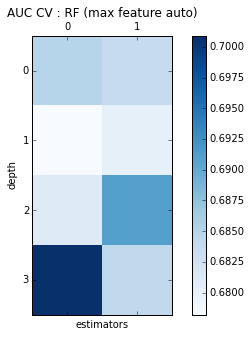

for 0m-18m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.668053 ['0.6472', '0.6821', '0.6768', '0.6533', '0.6808']
depth 3, n_estimator 100, max_features auto	 rf 0.661675 ['0.6554', '0.6960', '0.6470', '0.6512', '0.6587']
depth 4, n_estimator 100, max_features auto	 rf 0.669929 ['0.6689', '0.6855', '0.6520', '0.6697', '0.6736']
depth 5, n_estimator 100, max_features auto	 rf 0.667099 ['0.6532', '0.6953', '0.6631', '0.6567', '0.6671']
depth 2, n_estimator 300, max_features auto	 rf 0.660239 ['0.6406', '0.6765', '0.6633', '0.6643', '0.6565']
depth 3, n_estimator 300, max_features auto	 rf 0.668383 ['0.6543', '0.6975', '0.6602', '0.6671', '0.6627']
depth 4, n_estimator 300, max_features auto	 rf 0.669707 ['0.6513', '0.6907', '0.6807', '0.6606', '0.6653']
depth 5, n_estimator 300, max_features auto	 rf 0.668249 ['0.6767', '0.6831', '0.6607', '0.6547', '0.6661']




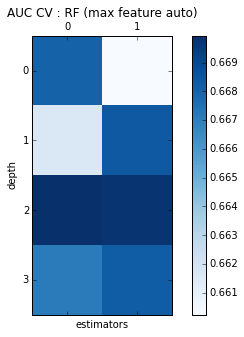

for 0m-24m
---------------
depth 2, n_estimator 100, max_features auto	 rf 0.661541 ['0.6525', '0.6925', '0.6802', '0.6496', '0.6329']
depth 3, n_estimator 100, max_features auto	 rf 0.667978 ['0.6652', '0.6948', '0.6785', '0.6683', '0.6331']
depth 4, n_estimator 100, max_features auto	 rf 0.667086 ['0.6629', '0.6899', '0.6812', '0.6712', '0.6302']
depth 5, n_estimator 100, max_features auto	 rf 0.669230 ['0.6668', '0.6757', '0.6830', '0.6789', '0.6418']
depth 2, n_estimator 300, max_features auto	 rf 0.670110 ['0.6637', '0.6801', '0.6858', '0.6798', '0.6411']
depth 3, n_estimator 300, max_features auto	 rf 0.669944 ['0.6608', '0.6965', '0.6882', '0.6747', '0.6295']
depth 4, n_estimator 300, max_features auto	 rf 0.673252 ['0.6546', '0.6962', '0.6921', '0.6871', '0.6362']
depth 5, n_estimator 300, max_features auto	 rf 0.668407 ['0.6659', '0.6932', '0.6861', '0.6562', '0.6406']




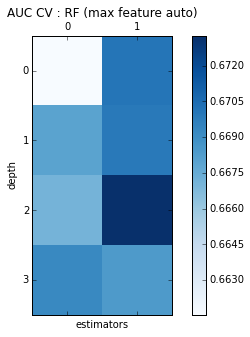

In [16]:
debug = False

df_train = df_train_all

kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True, random_state=0)

for label in to_classify_columns:
    print 'for %s' % label
    print '---------------'
    y = df_labels[label].values
    X = df_train.values
    time = df_labels['LKADT_P'].values

    max_depths = range(2,6)# 8)
    n_estimators = [100, 300]#, 1000, 2000]
    max_features = ['auto']#, 5]#, 45, 100]

    test_AUCs = np.zeros((len(max_depths), len(n_estimators), len(max_features)))

    for n_estimator, max_depth, max_feature in itertools.product(n_estimators, max_depths, max_features):
        criteria = []
        i = max_depths.index(max_depth)
        j = n_estimators.index(n_estimator)
        k = max_features.index(max_feature)

        for (train_split, test_split) in kf:

            clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, max_features=max_feature)
            clf.fit(X[train_split], y[train_split])
            criteria += [metrics.get_time_auc(clf, X[test_split], y[test_split], time[test_split],
                                              score_function=score_function_dict[label], n_bootstrap=30)]
            #criteria += [metrics.get_auc(clf, X[test_split], y[test_split], n_bootstrap=30)]

        test_AUCs[i, j, k] = sum(criteria)/len(criteria)
        print 'depth %i, n_estimator %i, max_features %s\t rf %f' % (max_depth, n_estimator, str(max_feature), test_AUCs[i, j, k]), ['%.4f' % c for c in criteria]


    print '\n'
    
    fig = plt.figure(figsize=(16,11))
    for k in range(len(max_features)):
        ax1 = fig.add_subplot(2, 2, k + 1)
        cax1 = ax1.matshow(test_AUCs[:,:,k], interpolation='nearest', cmap=plt.get_cmap("Blues"))
        fig.colorbar(cax1)
        ax1.set_title('AUC CV : RF (max feature %s)' % str(max_features[k]))
        ax1.set_ylabel('depth')
        ax1.set_xlabel('estimators')

    plt.show()
